# 0. Import Modules and Setup Global Variables

In [1]:
from METR4911_package import *
import cv2, os, uuid, time
import numpy as np
import math as m
%matplotlib inline

# 1. Detect Static Image

---------------------- FINGER CLASS --------------------
SIDE: [0.0, 'Person', 0.9283747, 4, 187, 250, 348, (3, 167, 62, 187, 6, 183)]
TOP: None

-------------------- FRUIT/VEGETABLES ------------------
SIDE: [0.0, 'Apple', 0.9605547, 258, 151, 382, 285, (257, 131, 304, 151, 260, 147)]
TOP: None

FRUIT/VEGETABLE STATS
-------------------------------------------------
Apple area (cm2): 34.370370370370374
Apple volume (cm3): 421.39066863534737
Apple mass (grams): 223.3370543767341
Apple calories (kcal): 116.13526827590174
-------------------------------------------------

Number of pixels in 1cm line: 18


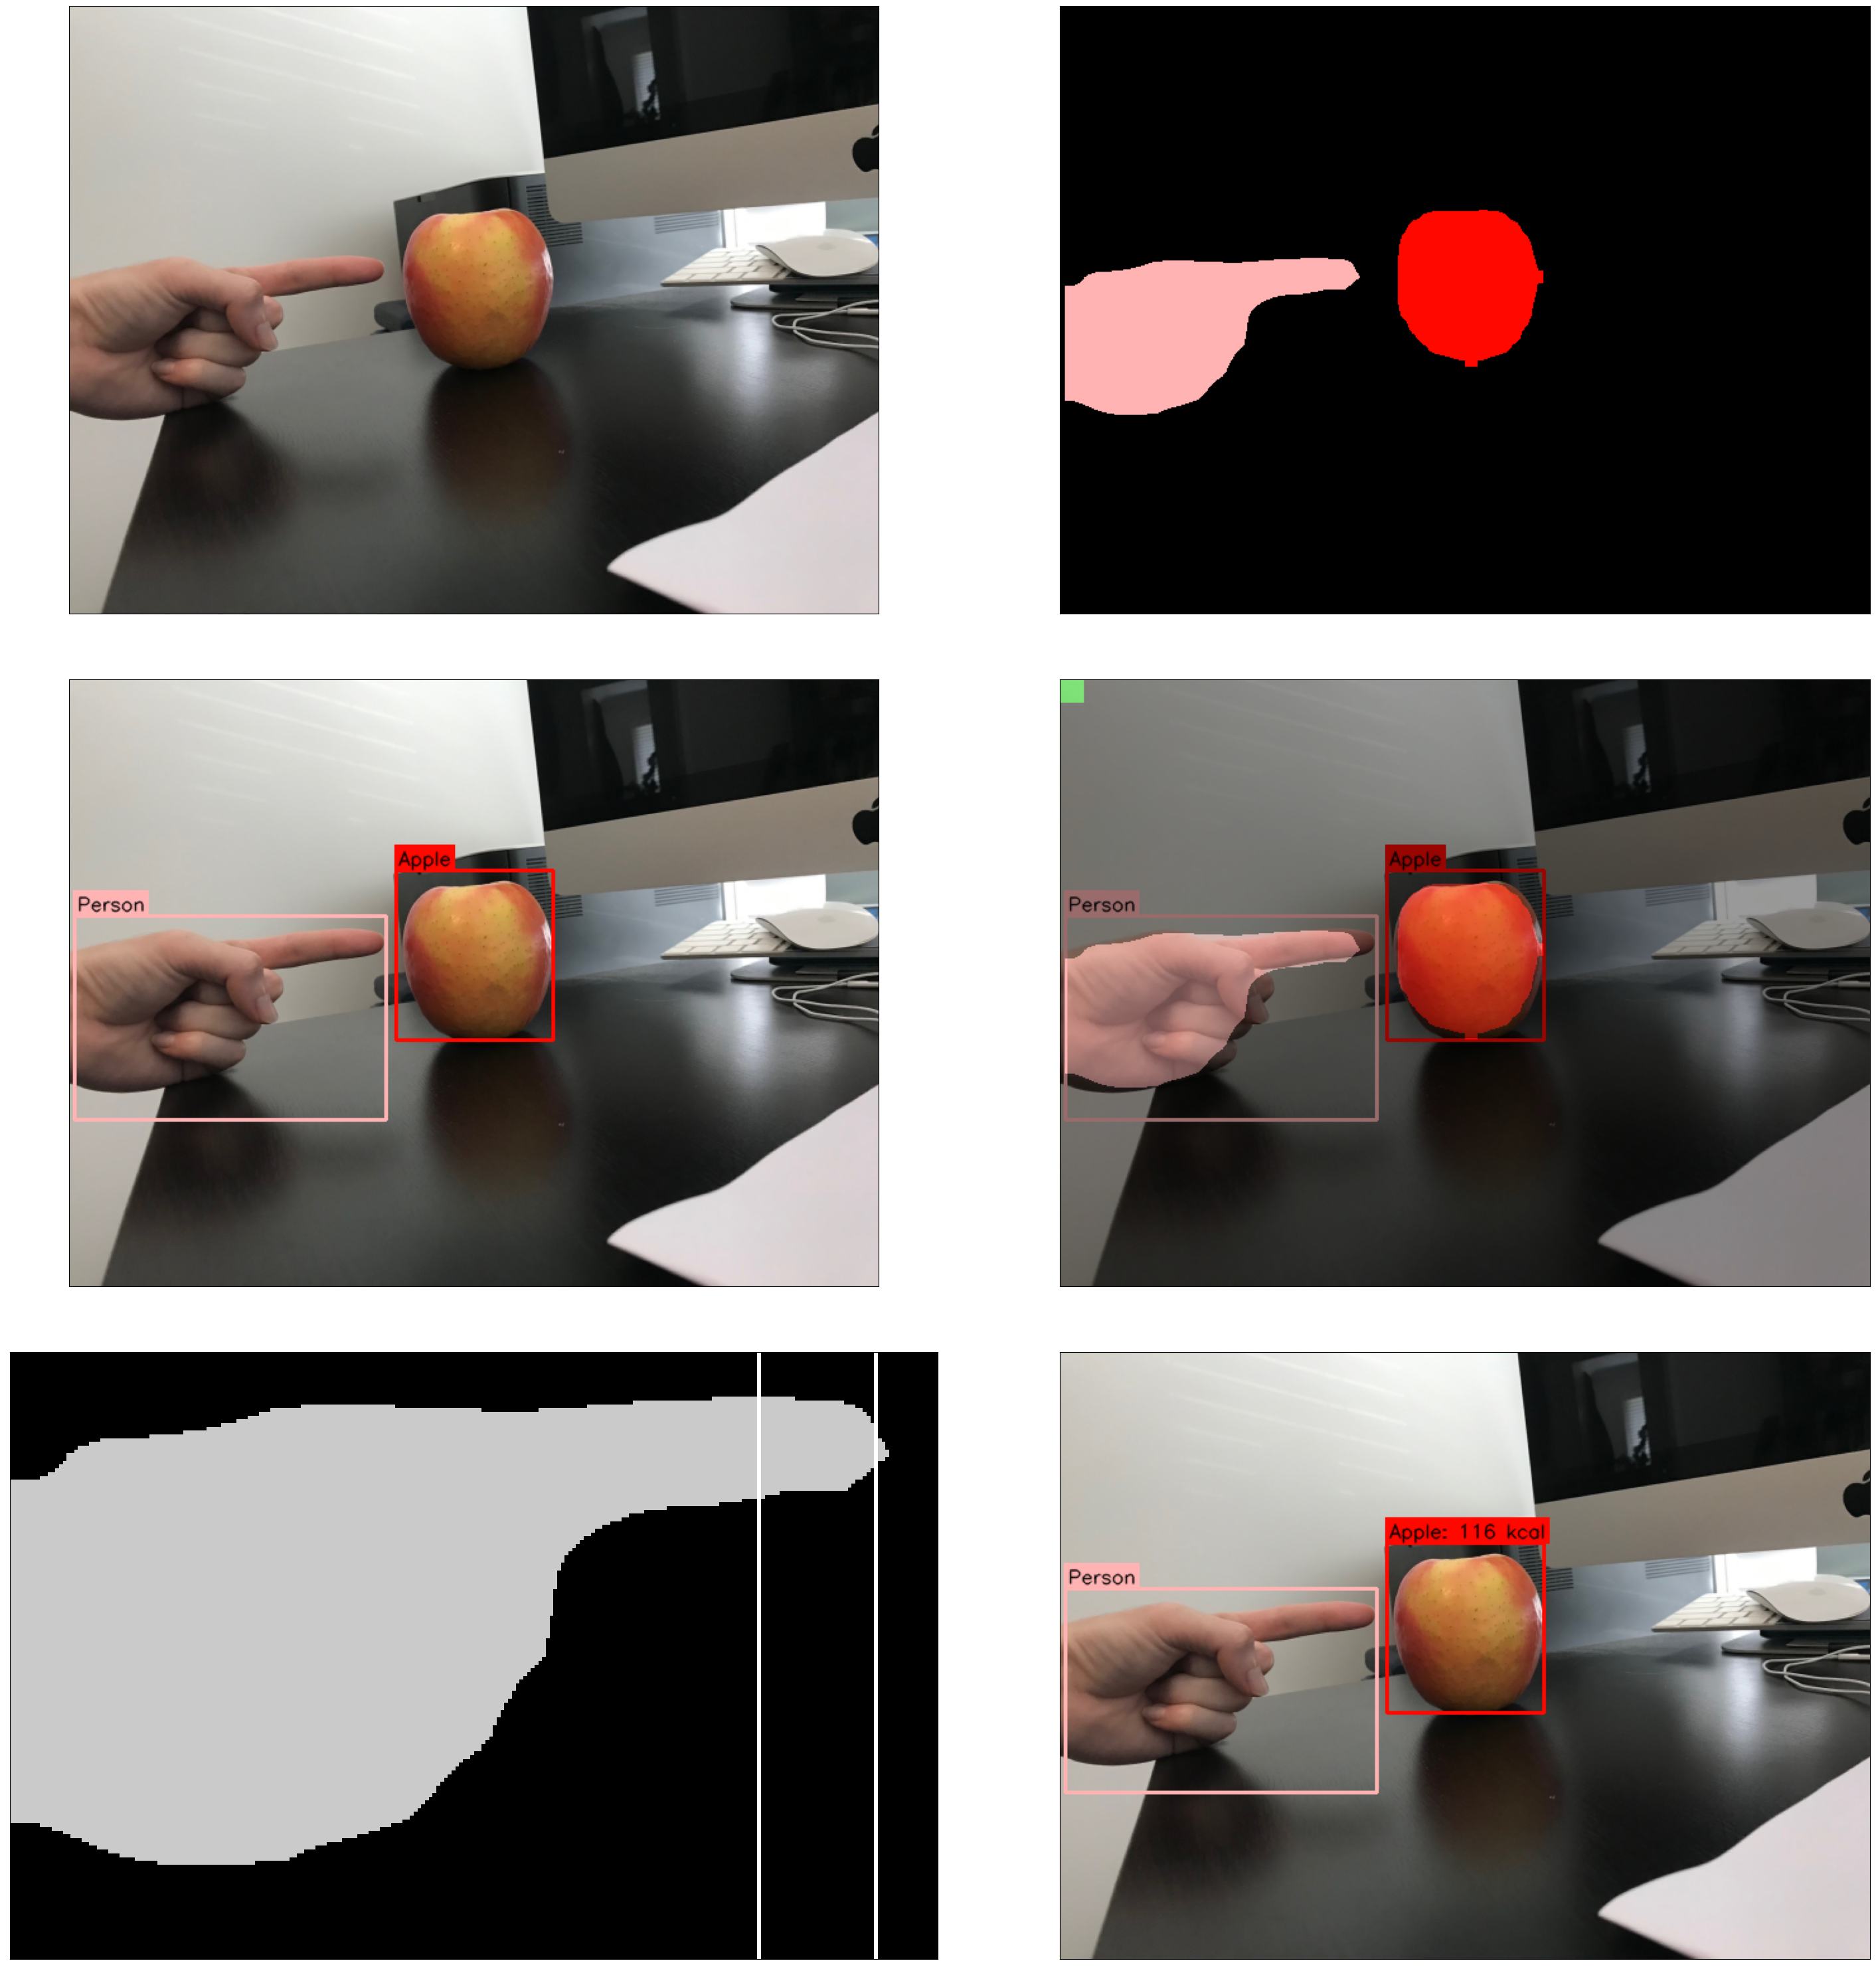

In [2]:
# Good results [IMG_2352, IMG_2336, IMG_2372, IMG_2374, IMG_2338 ] [IMG_2337 - No finger]
img_file = "apple1_sideview_264gram_3.JPG"
img_path = os.path.join("WebCam_images", "apple_test", img_file)
# img_path = os.path.join("WebCam_images", "iPhone_images", img_file)

demo_objects, demo_finger, demo_original_img, demo_segmentation_img, demo_object_detect_img = object_detect_img(img_path)

In [3]:
# Webcam
# cap = cv2.VideoCapture(0)
# a = 0
# while cap.isOpened():
#     ret, frame = cap.read()
#     cv2.imshow('webcam', frame)
#     if a == 1000:
#         break
#     a += 1
#     # if cv2.waitKey(10) & 0xFF == ord('3'):
#     #     time.sleep(2)
#     #     ret, frame = cap.read()
#     #     break
# cap.release()
# cv2.destroyAllWindows()

# save_path = os.path.join("WebCam_images", str(uuid.uuid4()) + ".jpg")
# cv2.imwrite(save_path, frame)

# demo_objects, demo_finger, demo_original_img, demo_segmentation_img, demo_object_detect_img = object_detect_img(frame,view="webcam")

In [4]:
# cap.release()
# cv2.destroyAllWindows()

demo_objects[0].radius

3.307631884095829

In [5]:
ITEM_VOLUME_ADJUSTMENT['Apple']

2.78

# 2. Show individual fruit/vegetable grey colour

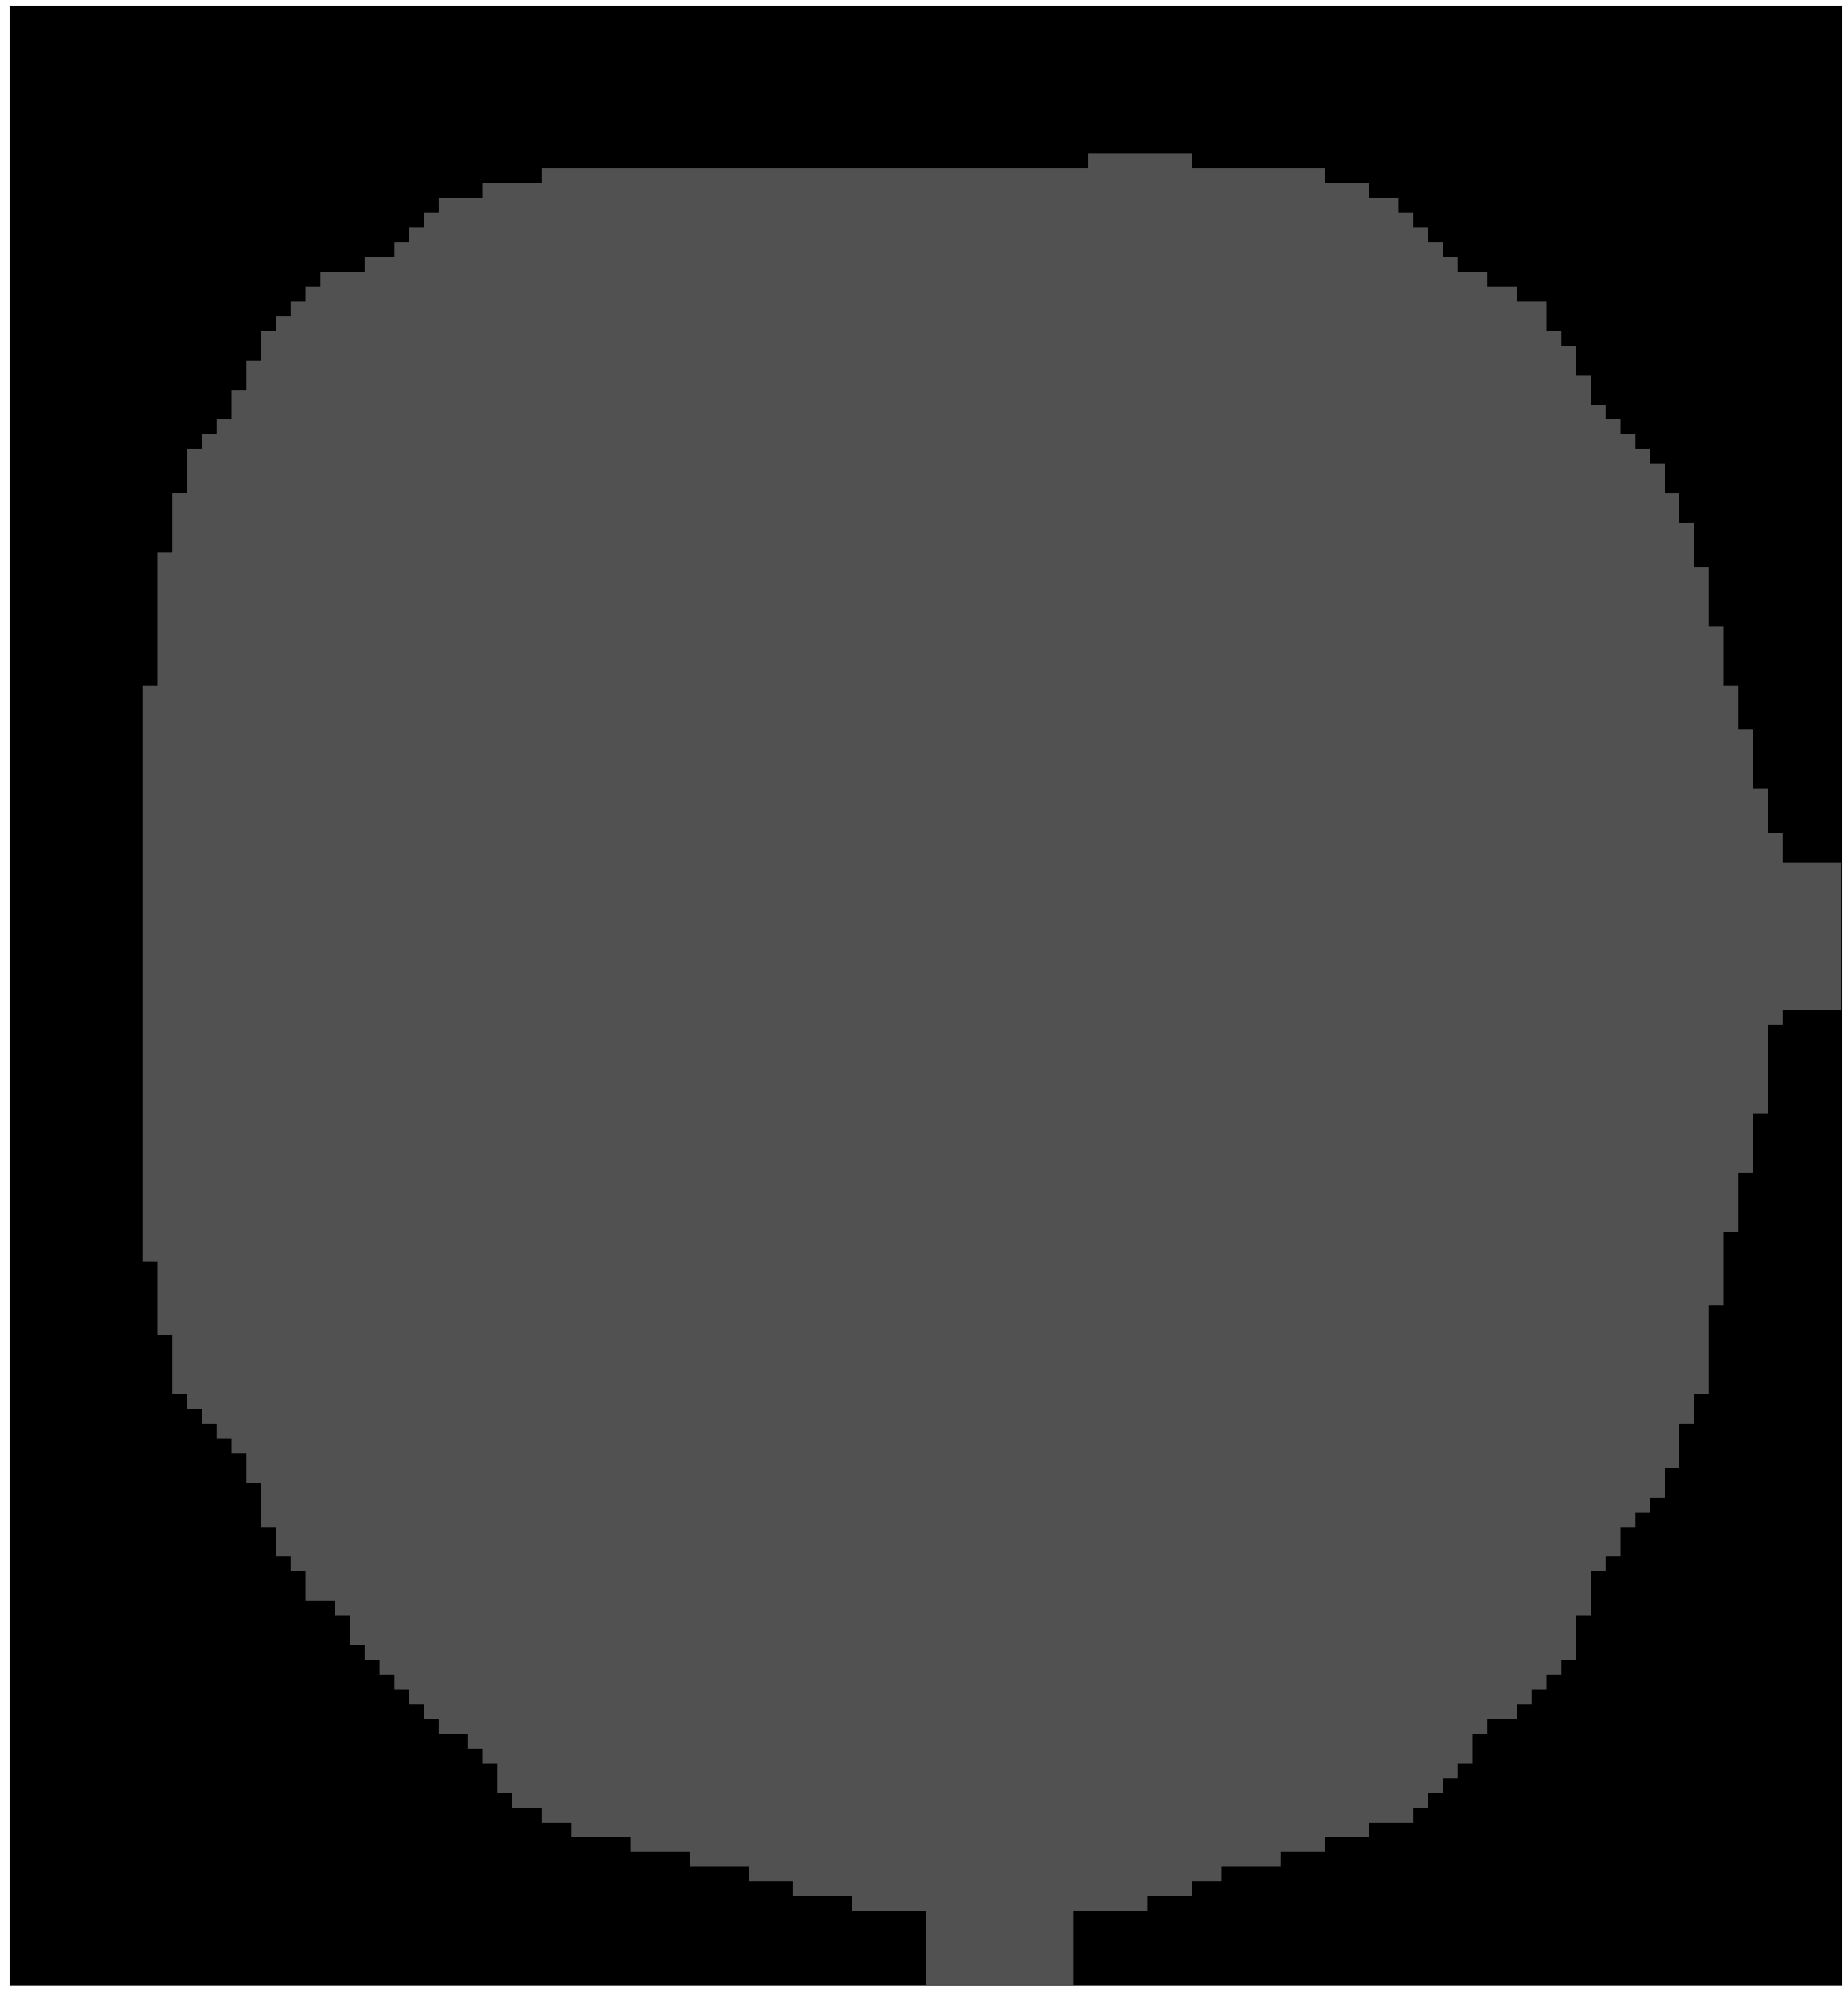

In [6]:
show_objects_itself_grey(demo_objects)